%load_ext autoreload
%autoreload 2
%matplotlib inline
This example code makes use of the pylhep library https://github.com/scikit-hep/pylhe 

In [1]:
import pylhe
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

sns.set_theme(style='whitegrid', font_scale=2, palette='deep')

In [2]:
events = pylhe.read_lhe_with_attributes('/home/mpresill/MG5_aMC_v3_6_4/all-inc/Events/run_01_decayed_1/unweighted_events.lhe')

In [3]:
data = {'event': [],
        'id': [],
        'px': [],
        'py': [],
        'pz': [],
       }

for n, event in tqdm(enumerate(events), unit='event(s)'):
    for particle in event.particles:
        data['event'].append(n)
        data['id'].append(particle.id)
        data['px'].append(particle.px)
        data['py'].append(particle.py)
        data['pz'].append(particle.pz)

10000event(s) [00:00, 10586.27event(s)/s]


In [4]:
df = pd.DataFrame(data)
df.head(10)

,event,id,px,py,pz
0,0,-11.0,0.000000e+00,0.000000e+00,1.200000e+02
1,0,11.0,-0.000000e+00,-0.000000e+00,-1.200000e+02
2,0,23.0,2.519394e+01,1.885282e+01,-4.146485e+01
3,0,-11.0,3.962191e+01,-2.693403e+01,-1.968544e+01
4,0,11.0,-1.442797e+01,4.578685e+01,-2.177941e+01
5,0,25.0,-2.519394e+01,-1.885282e+01,4.146485e+01
6,0,15.0,-4.597552e+00,1.359104e+01,7.984685e+01
7,0,22.0,-9.351412e-08,-5.266736e-08,1.666916e-07
8,0,-15.0,-2.059639e+01,-3.244386e+01,-3.838200e+01
9,0,16.0,-1.867862e+00,3.218181e+00,1.931344e+01


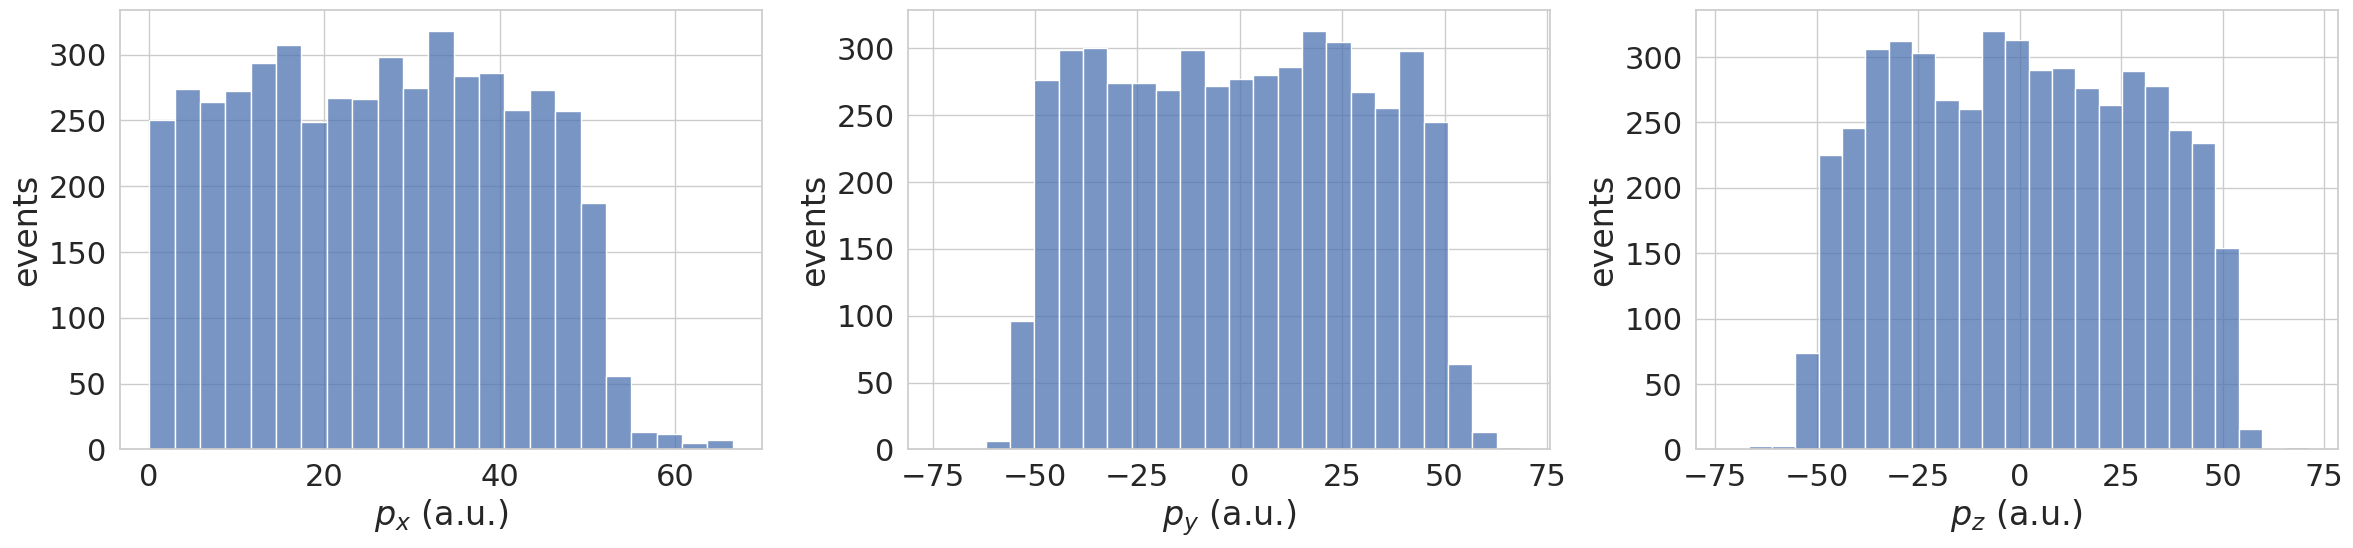

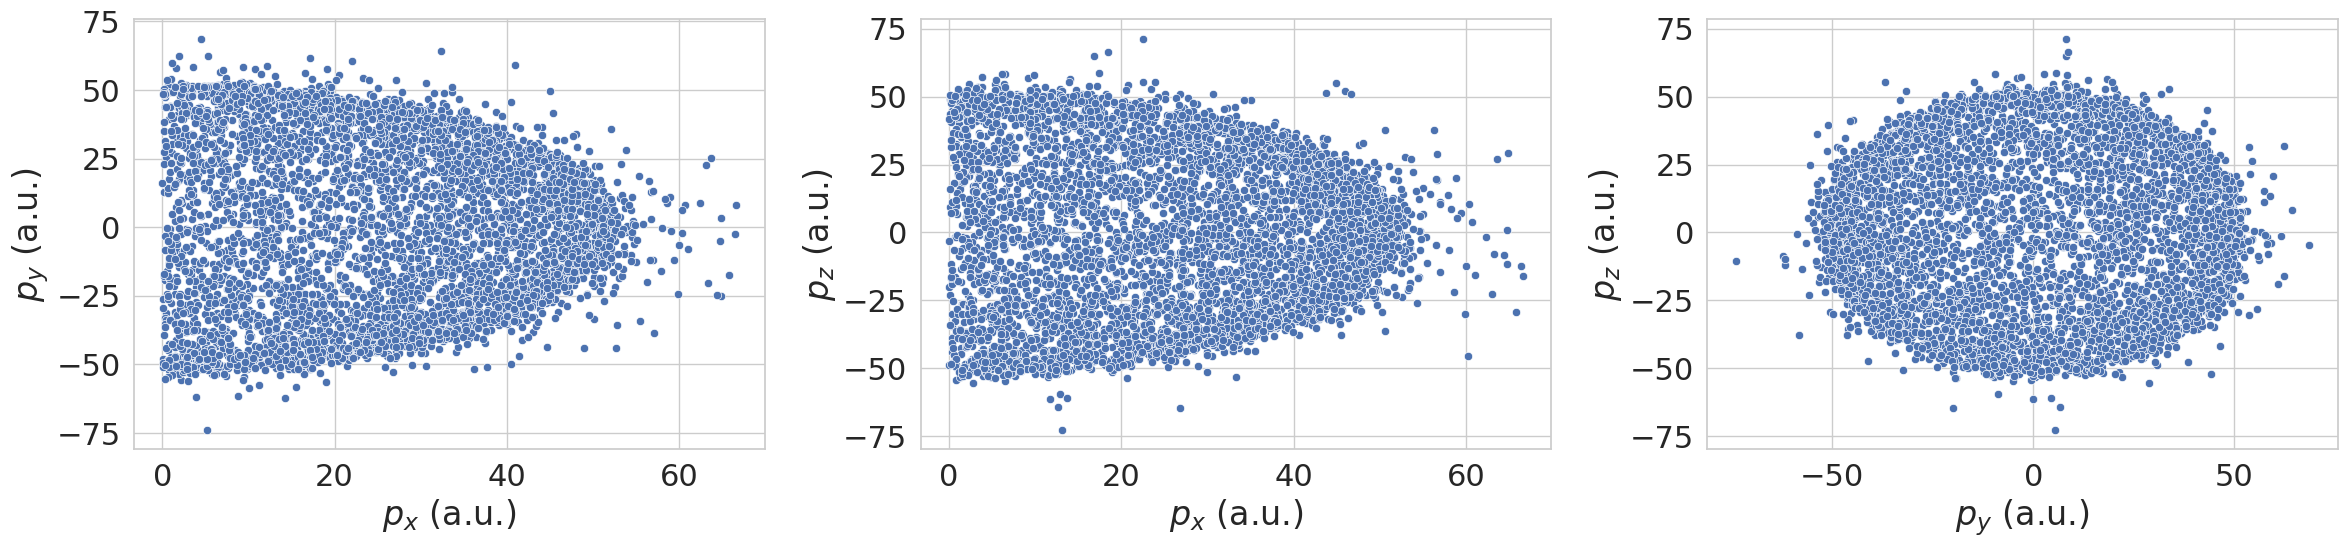

In [5]:
px = df.query('id == 23 & px > 0')['px'].values
py = df.query('id == 23 & px > 0')['py'].values
pz = df.query('id == 23 & px > 0')['pz'].values

fig, ax = plt.subplots(ncols=3, figsize=(24,6))

sns.histplot(px, stat='count', ax=ax[0])
ax[0].set(xlabel=r'$p_x$ (a.u.)', ylabel='events')

sns.histplot(py, stat='count', ax=ax[1])
ax[1].set(xlabel=r'$p_y$ (a.u.)', ylabel='events')

sns.histplot(pz, stat='count', ax=ax[2])
ax[2].set(xlabel=r'$p_z$ (a.u.)', ylabel='events')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(24,6))

sns.scatterplot(x=px, y=py, ax=ax[0])
ax[0].set(xlabel=r'$p_x$ (a.u.)', ylabel=r'$p_y$ (a.u.)')

sns.scatterplot(x=px, y=pz, ax=ax[1])
ax[1].set(xlabel=r'$p_x$ (a.u.)', ylabel=r'$p_z$ (a.u.)')

sns.scatterplot(x=py, y=pz, ax=ax[2])
ax[2].set(xlabel=r'$p_y$ (a.u.)', ylabel=r'$p_z$ (a.u.)')

plt.tight_layout()
plt.show()